In [1]:
#import packages
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import missingno as msno
import seaborn

In [2]:
#read the churn csv file then call info() function to check the datatype and the missing values
df = pd.read_csv(r'C:\Users\Saemi\OneDrive\Education\WGU\D206 Data Cleaning\PA\Medical Data and Dictionary Files\medical_raw_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            7412 non-null   float64
 16  Age  

In [4]:
#check if there is any duplicates for entire row
df.duplicated().value_counts()

False    10000
Name: count, dtype: int64

In [5]:
#verify if the CaseOrder, Customer_id, and Interaction columns are unique (result should be 10000 for no dupliates)
df.CaseOrder.value_counts().count()

10000

In [6]:
df.Customer_id.value_counts().count()

10000

In [7]:
df.Interaction.value_counts().count()

10000

In [8]:
df.UID.value_counts().count()

10000

In [9]:
#Spot for the number of null values
df.isnull().sum()

Unnamed: 0               0
CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
A

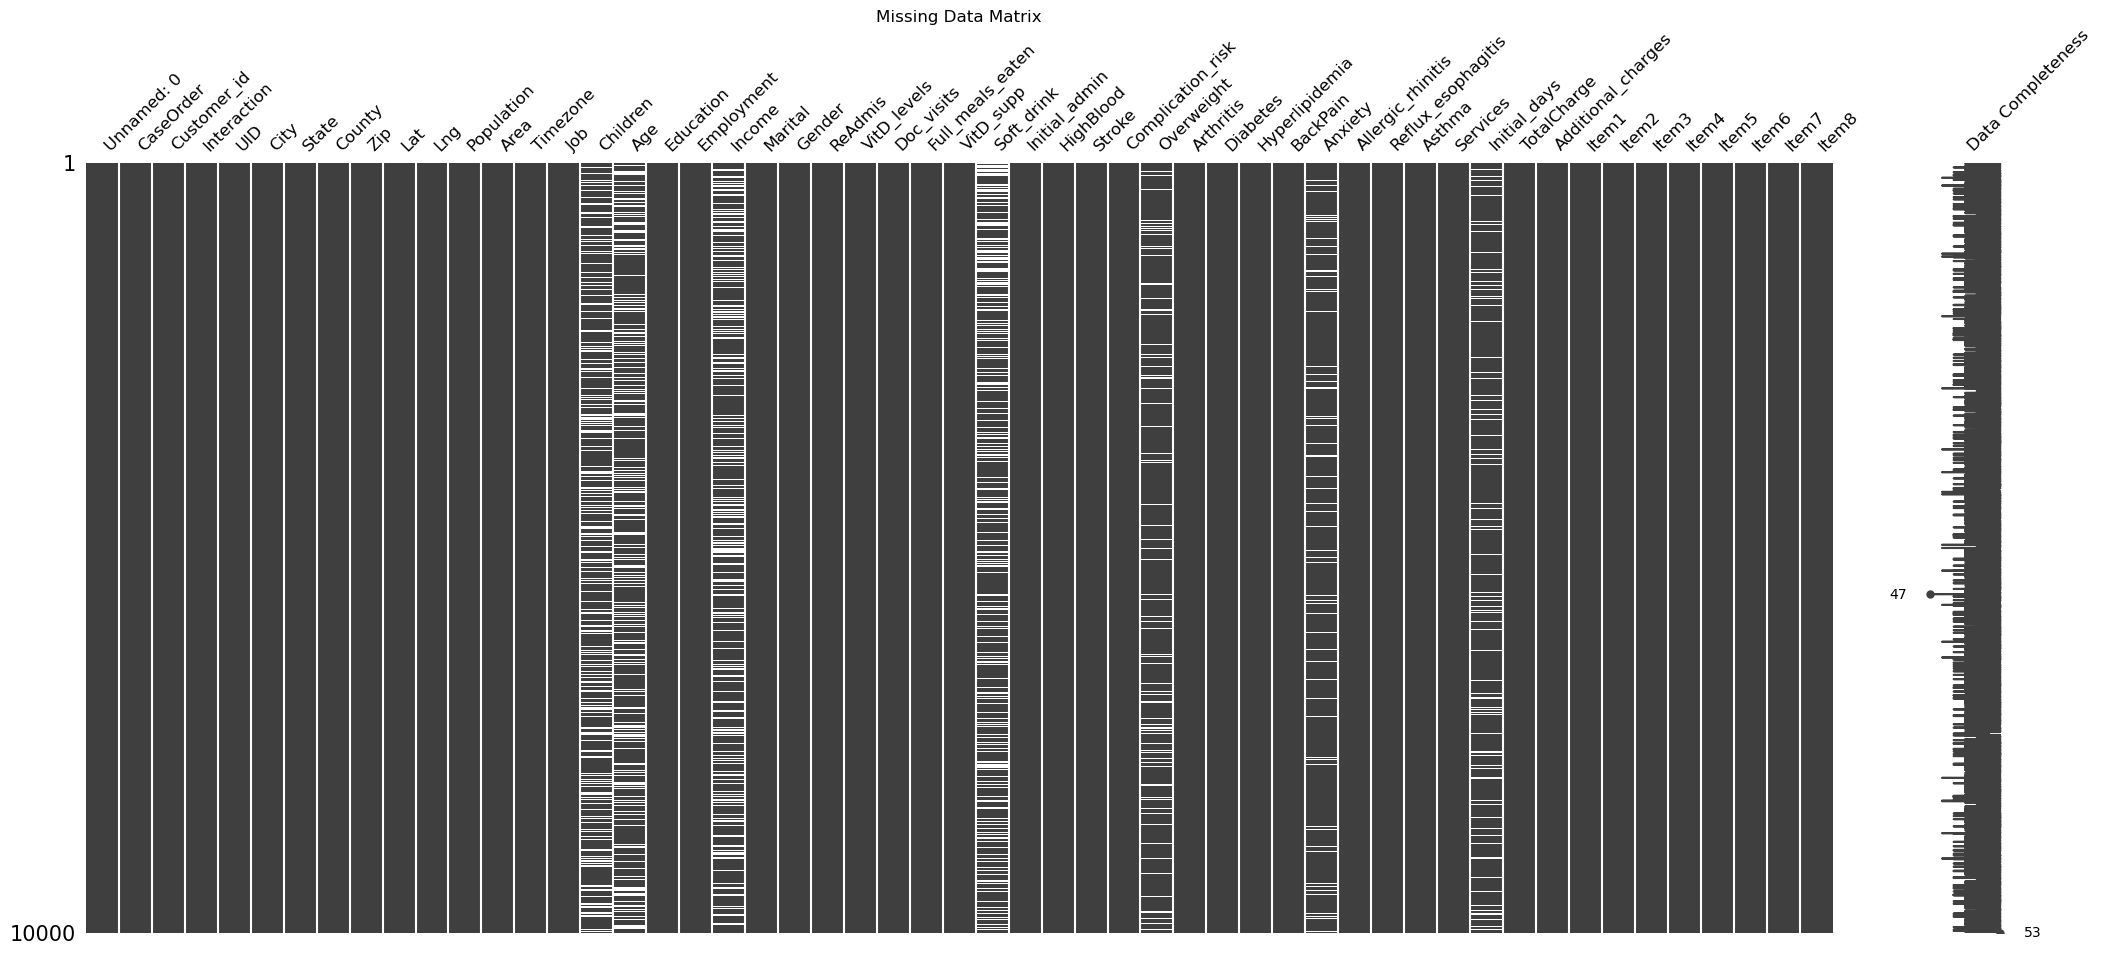

In [10]:
#visualize the dataset with missingno
msno.matrix(df, fontsize=12, labels=True)
plt.title('Missing Data Matrix')
plt.show()

(array([1880., 1858., 1094., 1113.,  739.,  126.,  145.,  154.,  157.,
         146.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

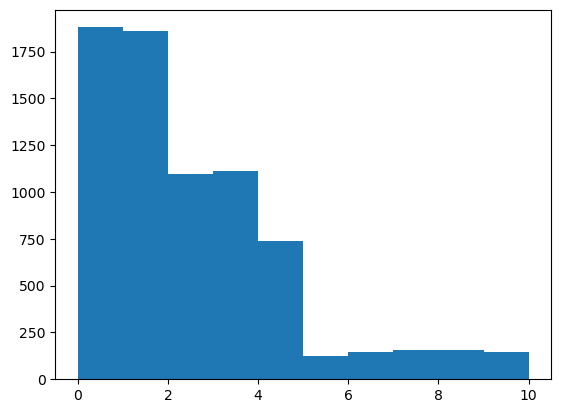

In [11]:
#visualize the quantitative columns out of those 7 to determine how to fill the null values
plt.hist(df['Children'])

In [12]:
#fill the null values in Children column using median() becuase it is skewed distribution
#check the median value first
df['Children'].median()

1.0

(array([1880., 4446., 1094., 1113.,  739.,  126.,  145.,  154.,  157.,
         146.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

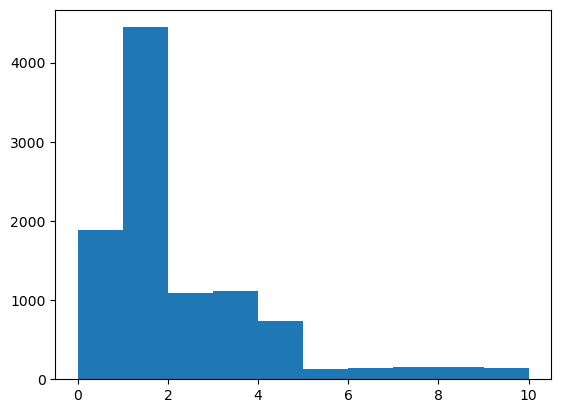

In [13]:
df['Children'].fillna(df['Children'].median(), inplace=True)

#validate the Children column
plt.hist(df['Children'])

(array([823., 761., 746., 753., 746., 739., 730., 765., 710., 813.]),
 array([18. , 25.1, 32.2, 39.3, 46.4, 53.5, 60.6, 67.7, 74.8, 81.9, 89. ]),
 <BarContainer object of 10 artists>)

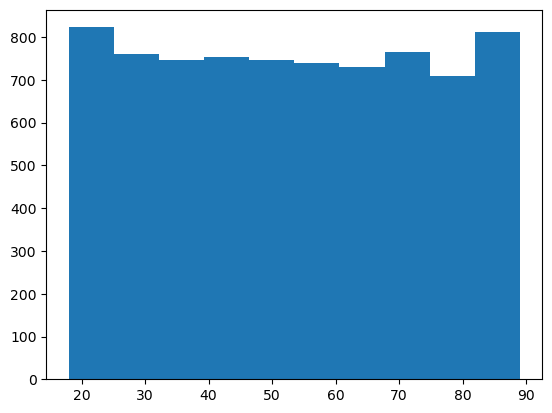

In [14]:
plt.hist(df['Age'])

In [15]:
#fill the null values in Age column using mean() because it is distributed equally
#use describe() to find out mean value
df['Age'].describe()

count    7586.000000
mean       53.295676
std        20.659182
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: Age, dtype: float64

(array([ 823.,  761.,  746.,  753., 3160.,  739.,  730.,  765.,  710.,
         813.]),
 array([18. , 25.1, 32.2, 39.3, 46.4, 53.5, 60.6, 67.7, 74.8, 81.9, 89. ]),
 <BarContainer object of 10 artists>)

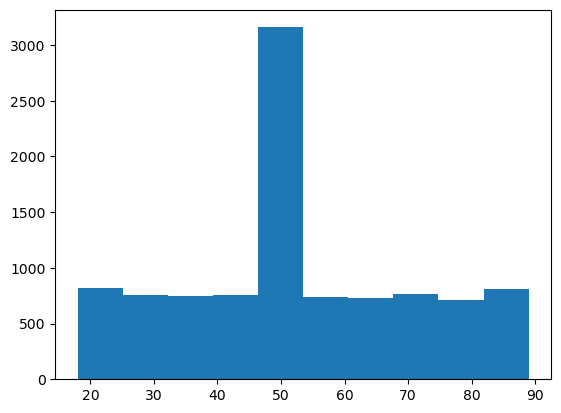

In [16]:
df['Age'].fillna(round(df['Age'].mean()), inplace=True)

#Validate Age column
plt.hist(df['Age'])

(array([2068., 2526., 1532.,  790.,  340.,  156.,   67.,   34.,   12.,
          11.]),
 array([1.54080000e+02, 2.08635850e+04, 4.15730900e+04, 6.22825950e+04,
        8.29921000e+04, 1.03701605e+05, 1.24411110e+05, 1.45120615e+05,
        1.65830120e+05, 1.86539625e+05, 2.07249130e+05]),
 <BarContainer object of 10 artists>)

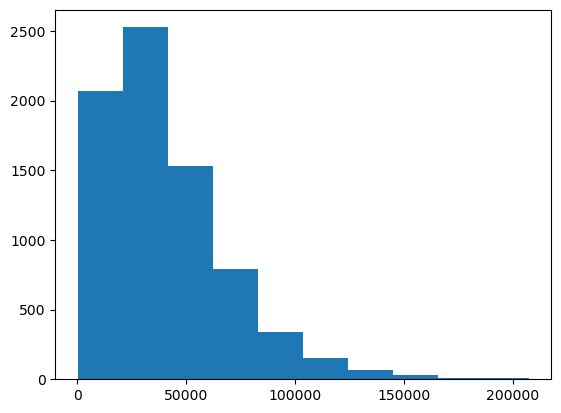

In [17]:
plt.hist(df['Income'])

In [18]:
#fill the null values in Income column using median() becuase it is skewed distribution
#check the median value of Income
df['Income'].median()

33942.28

(array([2068., 4990., 1532.,  790.,  340.,  156.,   67.,   34.,   12.,
          11.]),
 array([1.54080000e+02, 2.08635850e+04, 4.15730900e+04, 6.22825950e+04,
        8.29921000e+04, 1.03701605e+05, 1.24411110e+05, 1.45120615e+05,
        1.65830120e+05, 1.86539625e+05, 2.07249130e+05]),
 <BarContainer object of 10 artists>)

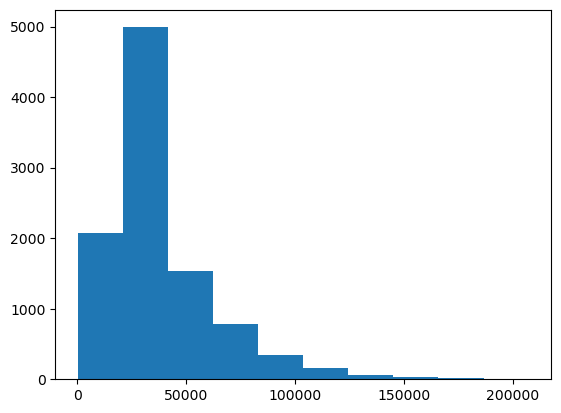

In [19]:
df['Income'].fillna(df['Income'].median(), inplace=True)

#Validate Income column
plt.hist(df['Income'])

(array([2288., 1429.,  599.,  134.,   32.,  235.,  502.,  916., 1314.,
        1495.]),
 array([ 1.00198092,  8.09993146, 15.197882  , 22.29583253, 29.39378307,
        36.49173361, 43.58968415, 50.68763469, 57.78558522, 64.88353576,
        71.9814863 ]),
 <BarContainer object of 10 artists>)

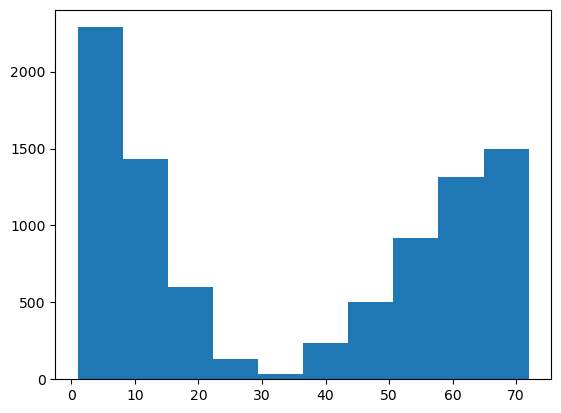

In [20]:
plt.hist(df['Initial_days'])

In [21]:
#check the median value for Initial_days
df['Initial_days'].median()

34.44694129

(array([2288., 1429.,  599.,  134., 1088.,  235.,  502.,  916., 1314.,
        1495.]),
 array([ 1.00198092,  8.09993146, 15.197882  , 22.29583253, 29.39378307,
        36.49173361, 43.58968415, 50.68763469, 57.78558522, 64.88353576,
        71.9814863 ]),
 <BarContainer object of 10 artists>)

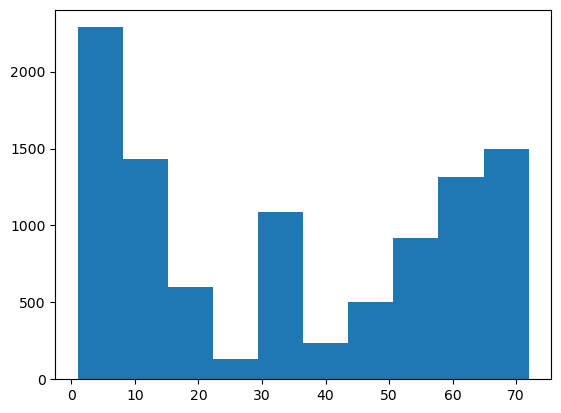

In [22]:
df['Initial_days'].fillna(df['Initial_days'].median(), inplace=True)

#validate Initial_days column
plt.hist(df['Initial_days'])

In [23]:
#fill the categorical null values with mode
df['Soft_drink'].fillna(statistics.mode(df['Soft_drink']), inplace=True)
df['Overweight'].fillna(statistics.mode(df['Overweight']), inplace=True)
df['Anxiety'].fillna(statistics.mode(df['Anxiety']), inplace=True)

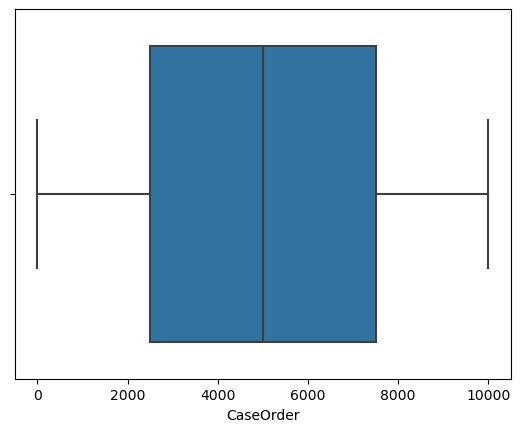

In [24]:
#check if there is any outliers for all the quantitative columns.
boxplot = seaborn.boxplot(x='CaseOrder', data=df)

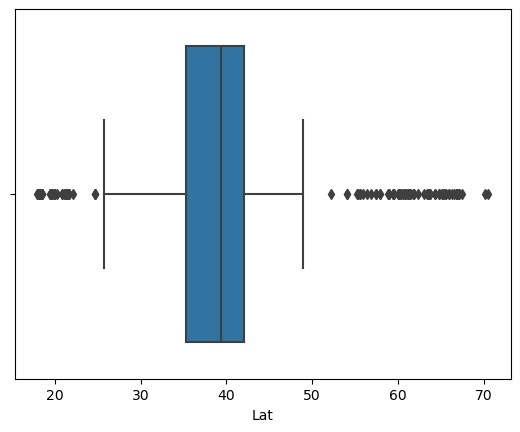

In [25]:
boxplot = seaborn.boxplot(x='Lat', data=df)

In [26]:
lat_query = df.query('Lat < 25 | 50 < Lat')
lat_query['Lat'].info()

<class 'pandas.core.series.Series'>
Index: 150 entries, 65 to 9906
Series name: Lat
Non-Null Count  Dtype  
--------------  -----  
150 non-null    float64
dtypes: float64(1)
memory usage: 2.3 KB


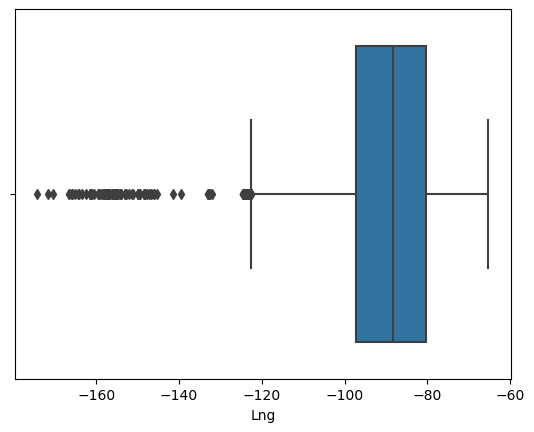

In [27]:
boxplot = seaborn.boxplot(x='Lng', data=df)

In [28]:
lng_query = df.query('-120 > Lng')
lng_query['Lng'].info()

<class 'pandas.core.series.Series'>
Index: 628 entries, 51 to 9968
Series name: Lng
Non-Null Count  Dtype  
--------------  -----  
628 non-null    float64
dtypes: float64(1)
memory usage: 9.8 KB


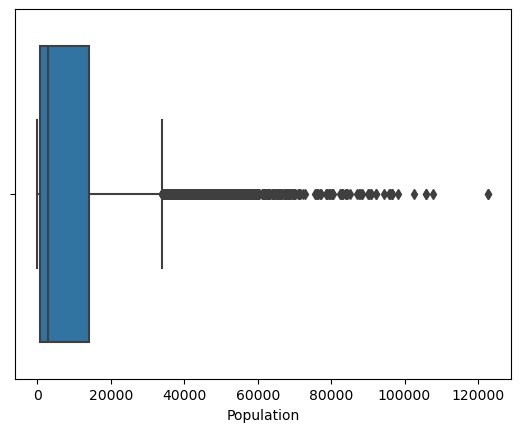

In [29]:
boxplot = seaborn.boxplot(x='Population', data=df)

In [30]:
population_query = df.query('35000 < Population')
population_query['Population'].info()

<class 'pandas.core.series.Series'>
Index: 805 entries, 8 to 9999
Series name: Population
Non-Null Count  Dtype
--------------  -----
805 non-null    int64
dtypes: int64(1)
memory usage: 12.6 KB


In [31]:
#leave it in the data because it is 8% of the dataset

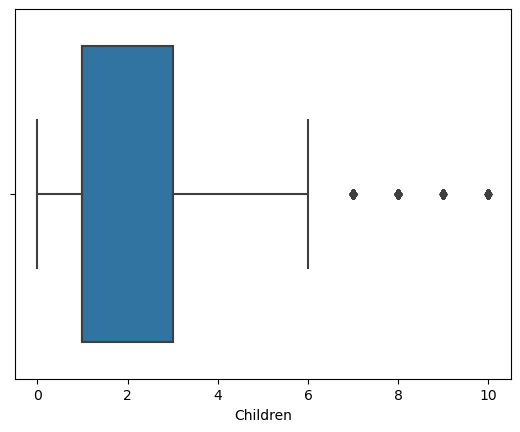

In [32]:
boxplot = seaborn.boxplot(x='Children', data=df)

In [33]:
children_query = df.query('6 < Children')
children_query['Children'].info()

<class 'pandas.core.series.Series'>
Index: 457 entries, 7 to 9999
Series name: Children
Non-Null Count  Dtype  
--------------  -----  
457 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [34]:
#imputing the Children outliers to the median, not impacing much with 5% of outliers
df['Children'] = np.where(df['Children'] > 7, np.nan, df['Children'])
df['Children'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Children
Non-Null Count  Dtype  
--------------  -----  
9697 non-null   float64
dtypes: float64(1)
memory usage: 78.3 KB


In [35]:
df['Children'].fillna(df['Children'].median(), inplace=True)
df['Children'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Children
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 78.3 KB


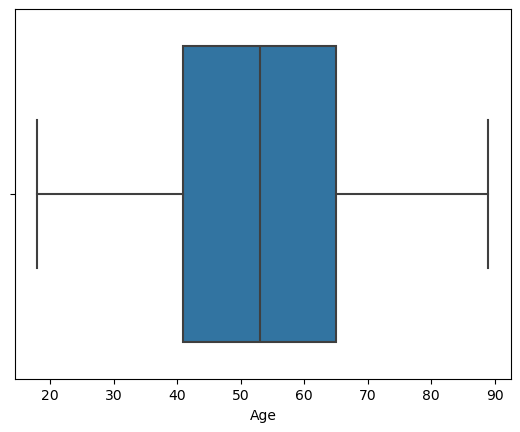

In [36]:
boxplot = seaborn.boxplot(x='Age', data=df)

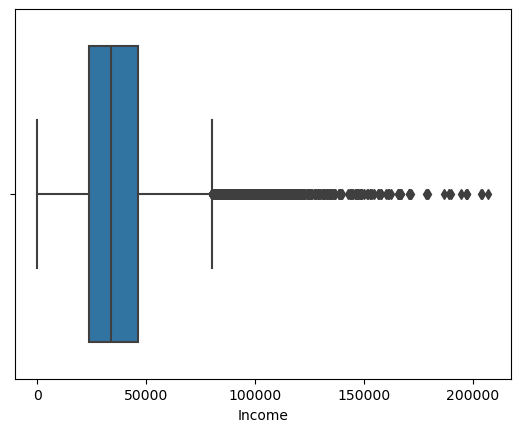

In [37]:
boxplot = seaborn.boxplot(x='Income', data=df)

In [38]:
income_query = df.query('75000 < Income')
income_query['Income'].info()

<class 'pandas.core.series.Series'>
Index: 870 entries, 0 to 9986
Series name: Income
Non-Null Count  Dtype  
--------------  -----  
870 non-null    float64
dtypes: float64(1)
memory usage: 13.6 KB


In [39]:
#remain the outliers as it is

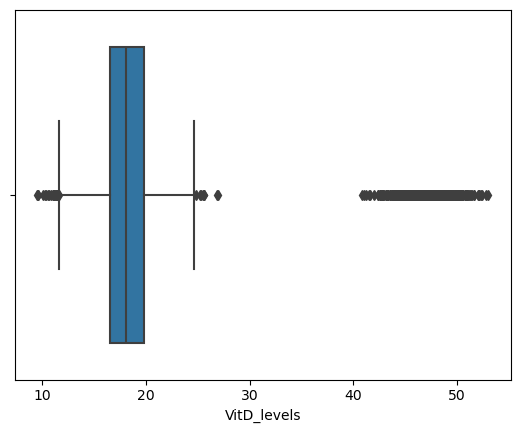

In [40]:
boxplot = seaborn.boxplot(x='VitD_levels', data=df)

In [41]:
VitD_level_query = df.query('VitD_levels < 12 | 25 < VitD_levels')
VitD_level_query['VitD_levels'].info()

<class 'pandas.core.series.Series'>
Index: 549 entries, 11 to 9973
Series name: VitD_levels
Non-Null Count  Dtype  
--------------  -----  
549 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


In [42]:
#imputing the outliers since there are approximately 5.5% of the dataset, not impacting much
df['VitD_levels'] = np.where(df['VitD_levels'] > 25, np.nan, df['VitD_levels'])
df['VitD_levels'] = np.where(df['VitD_levels'] < 12, np.nan, df['VitD_levels'])
df['VitD_levels'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: VitD_levels
Non-Null Count  Dtype  
--------------  -----  
9451 non-null   float64
dtypes: float64(1)
memory usage: 78.3 KB


In [43]:
df['VitD_levels'].fillna(df['VitD_levels'].median(), inplace=True)
df['VitD_levels'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: VitD_levels
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 78.3 KB


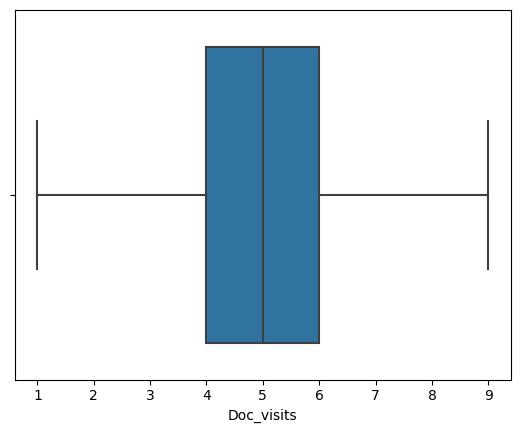

In [44]:
boxplot = seaborn.boxplot(x='Doc_visits', data=df)

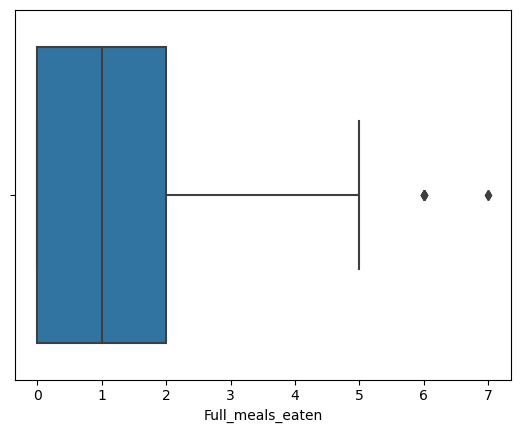

In [45]:
boxplot = seaborn.boxplot(x='Full_meals_eaten', data=df)

In [46]:
meals_eaten_query = df.query('5 < Full_meals_eaten')
meals_eaten_query['Full_meals_eaten'].info()

<class 'pandas.core.series.Series'>
Index: 8 entries, 958 to 9986
Series name: Full_meals_eaten
Non-Null Count  Dtype
--------------  -----
8 non-null      int64
dtypes: int64(1)
memory usage: 128.0 bytes


In [47]:
#imputing the outliers since there are only 0.07% of the dataset, not impacting much
df['Full_meals_eaten'] = np.where(df['Full_meals_eaten'] > 5, np.nan, df['Full_meals_eaten'])
df['Full_meals_eaten'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Full_meals_eaten
Non-Null Count  Dtype  
--------------  -----  
9992 non-null   float64
dtypes: float64(1)
memory usage: 78.3 KB


In [48]:
df['Full_meals_eaten'].fillna(df['Full_meals_eaten'].median(), inplace=True)
df['Full_meals_eaten'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Full_meals_eaten
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 78.3 KB


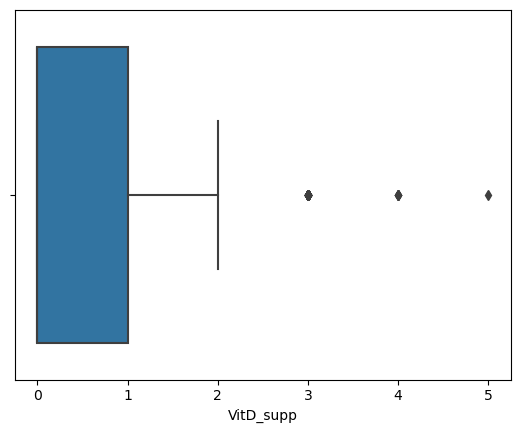

In [49]:
boxplot = seaborn.boxplot(x='VitD_supp', data=df)

In [50]:
VitD_supp_query = df.query('2 < VitD_supp')
VitD_supp_query['VitD_supp'].info()

<class 'pandas.core.series.Series'>
Index: 70 entries, 62 to 9982
Series name: VitD_supp
Non-Null Count  Dtype
--------------  -----
70 non-null     int64
dtypes: int64(1)
memory usage: 1.1 KB


In [51]:
#imputing the outliers since there are only 0.7% of the dataset, not impacting much
df['VitD_supp'] = np.where(df['VitD_supp'] > 2, np.nan, df['VitD_supp'])
df['VitD_supp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: VitD_supp
Non-Null Count  Dtype  
--------------  -----  
9930 non-null   float64
dtypes: float64(1)
memory usage: 78.3 KB


In [52]:
df['VitD_supp'].fillna(df['VitD_supp'].median(), inplace=True)
df['VitD_supp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: VitD_supp
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 78.3 KB


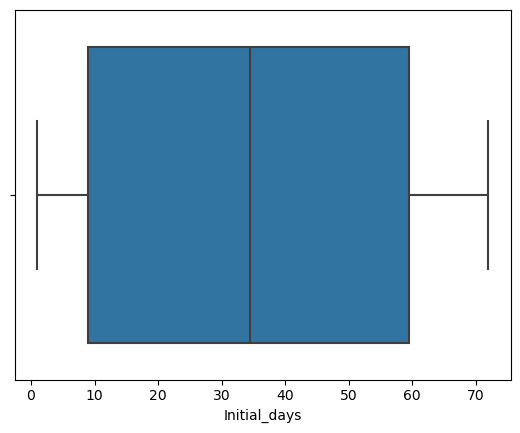

In [53]:
boxplot = seaborn.boxplot(x='Initial_days', data=df)

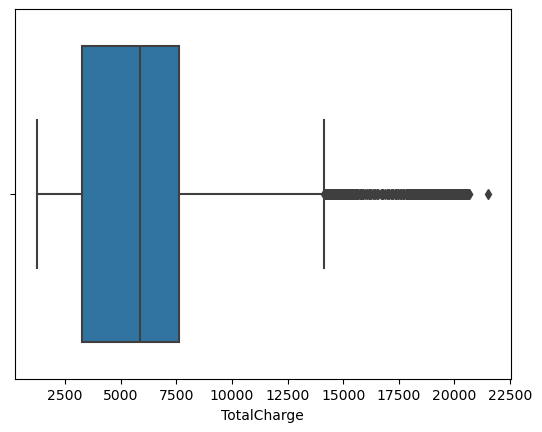

In [54]:
boxplot = seaborn.boxplot(x='TotalCharge', data=df)

In [55]:
TotalCharge_query = df.query('13750 < TotalCharge')
TotalCharge_query['TotalCharge'].info()

<class 'pandas.core.series.Series'>
Index: 488 entries, 11 to 9973
Series name: TotalCharge
Non-Null Count  Dtype  
--------------  -----  
488 non-null    float64
dtypes: float64(1)
memory usage: 7.6 KB


In [56]:
#remain because outliers are still valid and impacting the data since they are high number

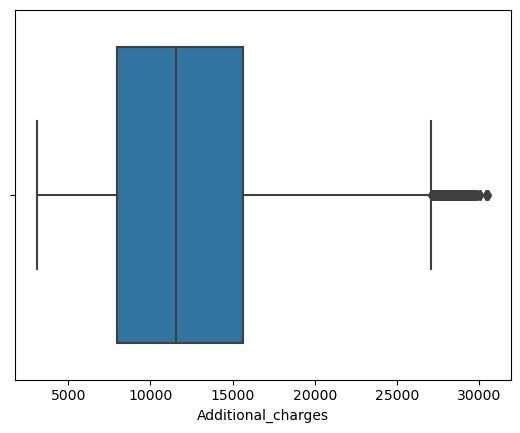

In [57]:
boxplot = seaborn.boxplot(x='Additional_charges', data=df)

In [58]:
Additional_query = df.query('27500 < Additional_charges')
Additional_query['Additional_charges'].info()

<class 'pandas.core.series.Series'>
Index: 358 entries, 20 to 9996
Series name: Additional_charges
Non-Null Count  Dtype  
--------------  -----  
358 non-null    float64
dtypes: float64(1)
memory usage: 5.6 KB


In [59]:
#remain because outliers are still valid and impacting the data since they are high number

In [60]:
#Inspect the qualitative columns to check categorical values for the following column
df['Area'].unique()

array(['Suburban', 'Urban', 'Rural'], dtype=object)

In [61]:
#Replicate the variable
df['Area_num'] = df['Area']
#Set up a dictionary for converting the categorical values to numeric values in alphabetical order
Area_num = {"Area_num": {"Rural":0, "Suburban":1, "Urban":2}}
df.replace(Area_num, inplace=True)

In [62]:
#Check the categorical values for the following column
df['Timezone'].unique()

array(['America/Chicago', 'America/New_York', 'America/Los_Angeles',
       'America/Indiana/Indianapolis', 'America/Detroit',
       'America/Denver', 'America/Nome', 'America/Anchorage',
       'America/Phoenix', 'America/Boise', 'America/Puerto_Rico',
       'America/Yakutat', 'Pacific/Honolulu', 'America/Menominee',
       'America/Kentucky/Louisville', 'America/Indiana/Vincennes',
       'America/Toronto', 'America/Indiana/Marengo',
       'America/Indiana/Winamac', 'America/Indiana/Tell_City',
       'America/Sitka', 'America/Indiana/Knox',
       'America/North_Dakota/New_Salem', 'America/Indiana/Vevay',
       'America/Adak', 'America/North_Dakota/Beulah'], dtype=object)

In [63]:
#Re-express the Timzone based on the time-zone using dictionary
mapping_time = {
    "America/New_York":"Eastern Time", "America/Chicago":"Central Time", "America/Los_Angeles":"Pacific Time",
    "America/Denver":"Mountain Time", "America/Detroit":"Eastern Time", "America/Indiana/Indianapolis":"Eastern Time",
    "America/Phoenix":"Mountain Time", "America/Boise":"Mountain Time", "America/Anchorage":"Alaska Time",
    "America/Puerto_Rico":"Atlantic Standard Time", "Pacific/Honolulu":"Hawaii-Aleutian Standard Time",
    "America/Menominee":"Central Time", "America/Nome":"Alaska Time", "America/Indiana/Vincennes":"Eastern Time",
    "America/Kentucky/Louisville":"Eastern Time", "America/Sitka":"Alaska Time", "America/Toronto":"Eastern Time",
    "America/Indiana/Marengo":"Eastern Time", "America/Indiana/Tell_City":"Eastern Time", 
    "America/North_Dakota/Beulah":"Central Time", "America/Yakutat":"Alaska Time", "America/Indiana/Winamac":"Eastern Time",
    "America/Indiana/Knox":"Eastern Time", "America/North_Dakota/New_Salem":"Central Time", 
    "America/Indiana/Vevay":"Eastern Time", "America/Adak":"Hawaii-Aleutian Standard Time"
}
#update the Timezone column values with mapping, then change the datatype to category
df['Timezone'] = df['Timezone'].replace(mapping_time)

In [64]:
df['Timezone'].unique()

array(['Central Time', 'Eastern Time', 'Pacific Time', 'Mountain Time',
       'Alaska Time', 'Atlantic Standard Time',
       'Hawaii-Aleutian Standard Time'], dtype=object)

In [65]:
#Replicate the variable
df['Timezone_num'] = df['Timezone']
#Set up a dictionary for converting the categorical values to numeric values in alphabetical order
Timezone_num = {"Timezone_num": {"Alaska Time":0, "Atlantic Standard Time":1, "Central Time":2, "Eastern Time":3, 
                                 "Hawaii-Aleutian Standard Time":4, "Mountain Time":5, "Pacific Time":6}}
df.replace(Timezone_num, inplace=True)

In [66]:
#Check the categorical values for the following column
df['Education'].unique()

array(['Some College, Less than 1 Year',
       'Some College, 1 or More Years, No Degree',
       'GED or Alternative Credential', 'Regular High School Diploma',
       "Bachelor's Degree", "Master's Degree",
       'Nursery School to 8th Grade',
       '9th Grade to 12th Grade, No Diploma', 'Doctorate Degree',
       "Associate's Degree", 'Professional School Degree',
       'No Schooling Completed'], dtype=object)

In [67]:
#Replicate the variable
df['Edu_num'] = df['Education']
#Set up a dictionary for converting the categorical values to numeric values in education order
Edu_num = {"Edu_num": {"No Schooling Completed":0, "Nursery School to 8th Grade":1, "9th Grade to 12th Grade, No Diploma":2, 
                       "GED or Alternative Credential":3, "Regular High School Diploma":4, "Some College, Less than 1 Year":5, 
                       "Some College, 1 or More Years, No Degree":6, "Associate's Degree":7, "Bachelor's Degree":8, 
                       "Master's Degree":9, "Doctorate Degree":10, "Professional School Degree":11}}
df.replace(Edu_num, inplace=True)

In [68]:
#Check the categorical values for the following column
df['Employment'].unique()

array(['Full Time', 'Retired', 'Unemployed', 'Student', 'Part Time'],
      dtype=object)

In [69]:
#Replicate the variable
df['Employ_num'] = df['Employment']
#Set up a dictionary for converting the categorical values to numeric values in alphabetical order
Employ_num = {"Employ_num": {"Full Time":0, "Part Time":1, "Retired":2,"Student":3, "Unemployed":4}}
df.replace(Employ_num, inplace=True)

In [70]:
#Check the categorical values for the following column
df['Marital'].unique()

array(['Divorced', 'Married', 'Widowed', 'Never Married', 'Separated'],
      dtype=object)

In [71]:
#Replicate the variable
df['Marital_num'] = df['Marital']
#Set up a dictionary for converting the categorical values to numeric values in alphabetical order
Marital_num = {"Marital_num": {"Divorced":0, "Married":1, "Never Married":2,"Separated":3, "Widowed":4}}
df.replace(Marital_num, inplace=True)

In [72]:
#Check the categorical values for the following column
df['Gender'].unique()

array(['Male', 'Female', 'Prefer not to answer'], dtype=object)

In [73]:
#Replicate the variable
df['Gender_num'] = df['Gender']
#Set up a dictionary for converting the categorical values to numeric values in alphabetical order
Gender_num = {"Gender_num": {"Female":0, "Male":1, "Prefer not to answer":2}}
df.replace(Gender_num, inplace=True)

In [74]:
#Check the categorical values for the following column
df['ReAdmis'].unique()

array(['No', 'Yes'], dtype=object)

In [75]:
#Replicate the variable
df['ReAdmis_num'] = df['ReAdmis']
#Set up a dictionary for converting the categorical values to numeric values in alphabetical order
ReAdmis_num = {"ReAdmis_num": {"No":0, "Yes":1}}
df.replace(ReAdmis_num, inplace=True)

In [76]:
#Check the categorical values for the following column
df['Soft_drink'].unique()

array(['No', 'Yes'], dtype=object)

In [77]:
#Replicate the variable
df['SoftDrink_num'] = df['Soft_drink']
#Set up a dictionary for converting the categorical values to numeric values in alphabetical order
SoftDrink_num = {"SoftDrink_num": {"No":0, "Yes":1}}
df.replace(SoftDrink_num, inplace=True)

In [78]:
#Check the categorical values for the following column
df['Initial_admin'].unique()

array(['Emergency Admission', 'Elective Admission',
       'Observation Admission'], dtype=object)

In [79]:
#Replicate the variable
df['Init_admin_num'] = df['Initial_admin']
#Set up a dictionary for converting the categorical values to numeric values in alphabetical order
Init_admin_num = {"Init_admin_num": {"Elective Admission":0, "Emergency Admission":1, "Observation Admission":2}}
df.replace(Init_admin_num, inplace=True)

In [80]:
#Check the categorical values for the following column
df['HighBlood'].unique()

array(['Yes', 'No'], dtype=object)

In [81]:
#Replicate the variable
df['HighBlood_num'] = df['HighBlood']
#Set up a dictionary for converting the categorical values to numeric values in alphabetical order
HighBlood_num = {"HighBlood_num": {"No":0, "Yes":1}}
df.replace(HighBlood_num, inplace=True)

In [82]:
#Check the categorical values for the following column
df['Stroke'].unique()

array(['No', 'Yes'], dtype=object)

In [83]:
#Replicate the variable
df['Stroke_num'] = df['Stroke']
#Set up a dictionary for converting the categorical values to numeric values in alphabetical order
Stroke_num = {"Stroke_num": {"No":0, "Yes":1}}
df.replace(Stroke_num, inplace=True)

In [84]:
#Check the categorical values for the following column
df['Complication_risk'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [85]:
#Replicate the variable
df['Comp_risk_num'] = df['Complication_risk']
#Set up a dictionary for converting the categorical values to numeric values in severity order
Comp_risk_num = {"Comp_risk_num": {"Low":0, "Medium":1, "High":2}}
df.replace(Comp_risk_num, inplace=True)

In [86]:
#Check the categorical values for the following column
df['Overweight'].unique()

array([0., 1.])

In [87]:
#Replicate the variable
df['Overweight_num'] = df['Overweight']
#Set up a dictionary for converting the categorical values to numeric values in alphabetical order
Overweight_num = {"Overweight_num": {"No":0, "Yes":1}}
df.replace(Overweight_num, inplace=True)   

In [88]:
#Check the categorical values for the following column
df['Arthritis'].unique()

array(['Yes', 'No'], dtype=object)

In [89]:
#Replicate the variable
df['Arthritis_num'] = df['Arthritis']
#Set up a dictionary for converting the categorical values to numeric values in alphabetical order
Arthritis_num = {"Arthritis_num": {"No":0, "Yes":1}}
df.replace(Arthritis_num, inplace=True)

In [90]:
#Check the categorical values for the following column
df['Diabetes'].unique()

array(['Yes', 'No'], dtype=object)

In [91]:
#Replicate the variable
df['Diabetes_num'] = df['Diabetes']
#Set up a dictionary for converting the categorical values to numeric values in alphabetical order
Diabetes_num = {"Diabetes_num": {"No":0, "Yes":1}}
df.replace(Diabetes_num, inplace=True)

In [92]:
#Check the categorical values for the following column
df['Hyperlipidemia'].unique()

array(['No', 'Yes'], dtype=object)

In [93]:
#Replicate the variable
df['Hyperlipidemia_num'] = df['Hyperlipidemia']
#Set up a dictionary for converting the categorical values to numeric values in alphabetical order
Hyperlipidemia_num = {"Hyperlipidemia_num": {"No":0, "Yes":1}}
df.replace(Hyperlipidemia_num, inplace=True)

In [94]:
#Check the categorical values for the following column
df['BackPain'].unique()

array(['Yes', 'No'], dtype=object)

In [95]:
#Replicate the variable
df['BackPain_num'] = df['BackPain']
#Set up a dictionary for converting the categorical values to numeric values in alphabetical order
BackPain_num = {"BackPain_num": {"No":0, "Yes":1}}
df.replace(BackPain_num, inplace=True)

In [96]:
#Check the categorical values for the following column
df['Anxiety'].unique()

array([1., 0.])

In [97]:
#Replicate the variable
df['Anxiety_num'] = df['Anxiety']
#Set up a dictionary for converting the categorical values to numeric values in alphabetical order
Anxiety_num = {"Anxiety_num": {"No":0, "Yes":1}}
df.replace(Anxiety_num, inplace=True) 

In [98]:
#Check the categorical values for the following column
df['Allergic_rhinitis'].unique()

array(['Yes', 'No'], dtype=object)

In [99]:
#Replicate the variable
df['Allergic_rhinitis_num'] = df['Allergic_rhinitis']
#Set up a dictionary for converting the categorical values to numeric values in alphabetical order
Allergic_rhinitis_num = {"Allergic_rhinitis_num": {"No":0, "Yes":1}}
df.replace(Allergic_rhinitis_num, inplace=True)

In [100]:
#Check the categorical values for the following column
df['Reflux_esophagitis'].unique()

array(['No', 'Yes'], dtype=object)

In [101]:
#Replicate the variable
df['Reflux_esophagitis_num'] = df['Reflux_esophagitis']
#Set up a dictionary for converting the categorical values to numeric values in alphabetical order
Reflux_esophagitis_num = {"Reflux_esophagitis_num": {"No":0, "Yes":1}}
df.replace(Reflux_esophagitis_num, inplace=True)

In [102]:
#Check the categorical values for the following column
df['Asthma'].unique()

array(['Yes', 'No'], dtype=object)

In [103]:
#Replicate the variable
df['Asthma_num'] = df['Asthma']
#Set up a dictionary for converting the categorical values to numeric values in alphabetical order
Asthma_num = {"Asthma_num": {"No":0, "Yes":1}}
df.replace(Asthma_num, inplace=True)

In [104]:
#Check the categorical values for the following column
df['Services'].unique()

array(['Blood Work', 'Intravenous', 'CT Scan', 'MRI'], dtype=object)

In [105]:
#Replicate the variable
df['Services_num'] = df['Services']
#Set up a dictionary for converting the categorical values to numeric values in alphabetical order
Services_num = {"Services_num": {"Blood Work":0, "CT Scan":1, "Intravenous":2, "MRI":3}}
df.replace(Services_num, inplace=True)

In [106]:
#save the cleaned dataset
df.to_csv("Saemi Ramirez D206 Result.csv")

In [107]:
#check the dataset again for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 75 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              10000 non-null  int64  
 1   CaseOrder               10000 non-null  int64  
 2   Customer_id             10000 non-null  object 
 3   Interaction             10000 non-null  object 
 4   UID                     10000 non-null  object 
 5   City                    10000 non-null  object 
 6   State                   10000 non-null  object 
 7   County                  10000 non-null  object 
 8   Zip                     10000 non-null  int64  
 9   Lat                     10000 non-null  float64
 10  Lng                     10000 non-null  float64
 11  Population              10000 non-null  int64  
 12  Area                    10000 non-null  object 
 13  Timezone                10000 non-null  object 
 14  Job                     10000 non-null 

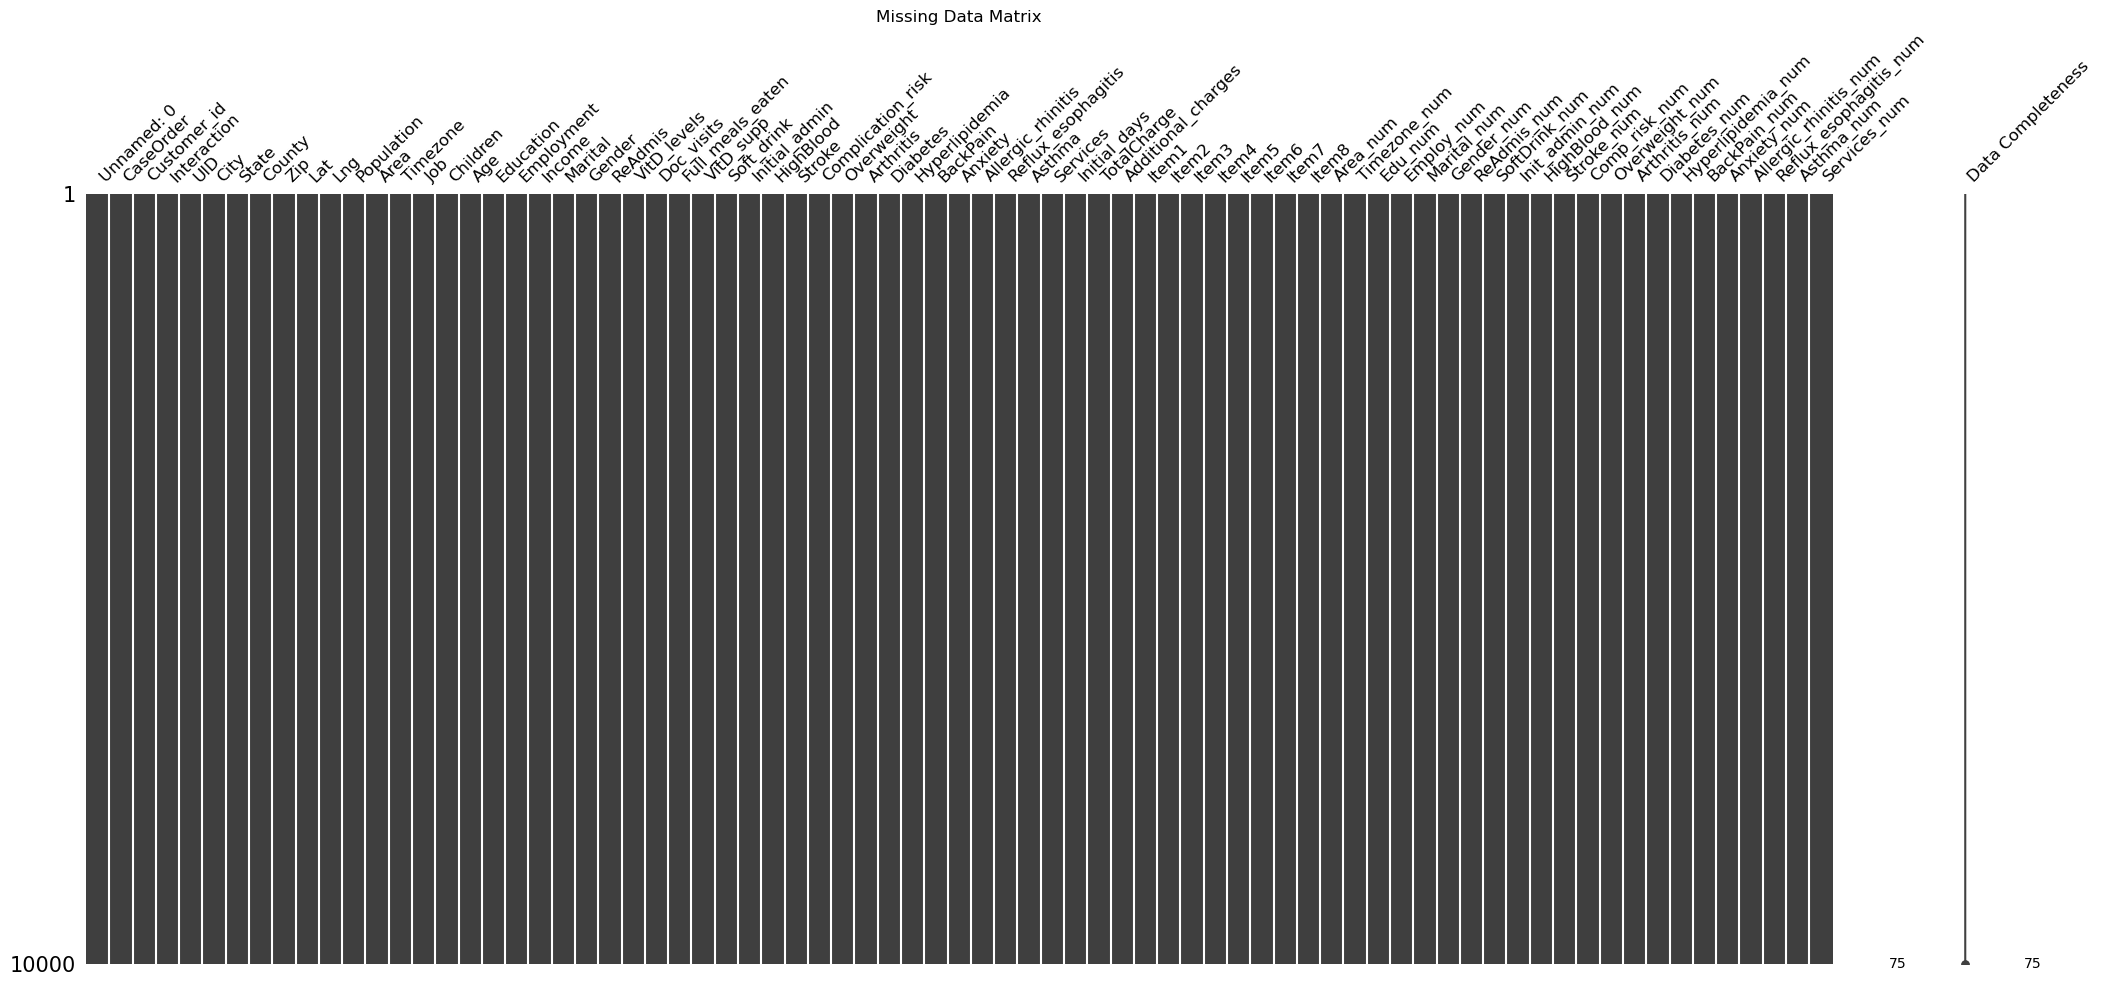

In [108]:
#visualize the dataset with missingno
msno.matrix(df, fontsize=12, labels=True)
plt.title('Missing Data Matrix')
plt.show()

In [109]:
#import package for PCA
from sklearn.decomposition import PCA

In [110]:
#create new dataframe for the quantitative columns with continuous numbers
df_new = df[['Lat', 'Lng', 'Income', 'VitD_levels', 'Initial_days', 'TotalCharge', 'Additional_charges']]

In [111]:
#normalize the data
df_new_norm = (df_new-df_new.mean())/df_new.std()

In [112]:
#get the number of components in the new data set
pca = PCA(n_components=df_new.shape[1])
pca

PCA(n_components=7)

In [113]:
#fit the normalized form to pca, then transform it back to dataframe
pca.fit(df_new_norm)
df_pca = pd.DataFrame(pca.transform(df_new_norm))
columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7']

In [114]:
loadings = pd.DataFrame(pca.components_.T,
                       columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'],
                       index=df_new.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Lat,-0.022653,0.707110,0.008381,-0.041609,-0.054451,-0.703358,-0.001749
Lng,-0.013240,-0.702697,-0.074832,-0.109119,-0.025964,-0.698426,-0.007823
Income,-0.012236,-0.055305,0.432479,0.786871,0.417101,-0.128889,-0.001333
VitD_levels,0.040022,0.055363,-0.711837,0.025425,0.695551,-0.009304,-0.064002
Initial_days,0.704587,0.003686,0.082478,-0.026642,-0.020396,-0.013098,-0.703878
TotalCharge,0.707228,0.002096,-0.011970,0.009040,0.011232,-0.023974,0.706328
Additional_charges,0.030758,-0.008376,-0.541880,0.604779,-0.581424,-0.006537,-0.038671


In [115]:
#selecting PCs utilizing Kaiser Rule with eigenvalues greater than 1
cov_matrix = np.dot(df_new_norm.T, df_new_norm/df_new.shape[0])
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

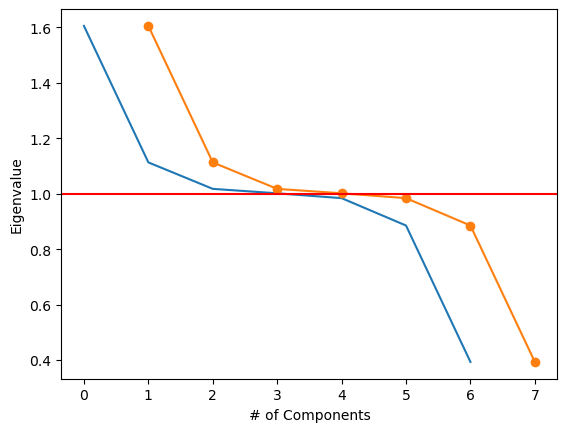

In [116]:
#visualize the eigenvalues with scree plot
plt.plot(eigenvalues)
plt.plot(np.arange(1, len(eigenvalues)+1), eigenvalues, marker='o')
plt.xlabel('# of Components')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color="red")
plt.show()